Links:

https://docs.pymc.io/en/v3/pymc-examples/examples/diagnostics_and_criticism/posterior_predictive.html

https://docs.pymc.io/en/v3/pymc-examples/examples/pymc3_howto/updating_priors.html

https://alpopkes.com/posts/machine_learning/bayesian_linear_regression/

https://maxhalford.github.io/blog/bayesian-linear-regression/

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

### Generating data

In [2]:
np.random.seed(16)

# Parameters
size = 1000
beta_0, beta_1 = 1, 2

# Simulate outcome variable
x = np.random.random(size)
y = beta_0 + beta_1 * x + np.random.randn(size)
data = pd.DataFrame(dict(x=x, y=y))
data.head()

,x,y
0,0.223291,-1.450413
1,0.523163,2.010962
2,0.550701,0.703249
3,0.045602,1.658509
4,0.360729,-0.055027


### Frequentist linear regression

In [3]:
X = sm.add_constant(data['x'])
Y = data['y']
reg = sm.OLS(Y, X)

model_freq = reg.fit()
print(model_freq.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     336.4
Date:                Sun, 12 Jun 2022   Prob (F-statistic):           5.51e-65
Time:                        15:28:54   Log-Likelihood:                -1448.9
No. Observations:                1000   AIC:                             2902.
Df Residuals:                     998   BIC:                             2912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9862      0.064     15.348      0.0

In [4]:
beta_0_ols, beta_1_ols = model_freq.params
print(f'Intercept: {beta_0_ols}')
print(f'Slope: {beta_1_ols}')

Intercept: 0.986230345022046
Slope: 2.071679208492629


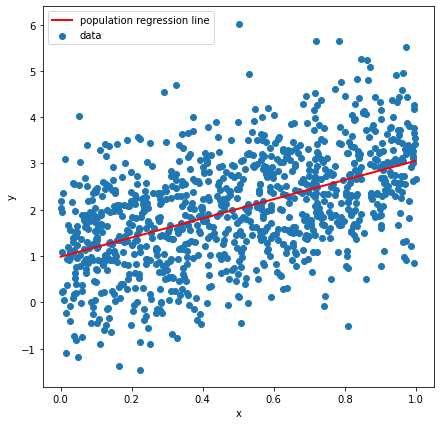

In [5]:
fig, axs = plt.subplots(figsize=(7, 7))
plt.scatter(data['x'], data['y'], label='data')
x_line = np.linspace(-0, 1, 50)
plt.plot(x_line, x_line*beta_1_ols+beta_0_ols, label='population regression line', c='red', lw=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()